In [14]:
import seaborn as sns
import pandas as pd
import os
from sklearn.metrics import *
import matplotlib.pyplot as plt
import scanpy as sc


In [15]:
import palettable

method_order = [
    'Louvain','Leiden',
    'SpaGCN_without',
    'SpaGCN_with','BayesSpace', 'stLearn',
    'SEDR',
    'CCST','SCAN-IT','STAGATE','SpaceFlow','conST_nopre','BASS','DeepST'
]

cmp = palettable.tableau.Tableau_20.mpl_colors
method_color_dict = dict(zip(method_order,cmp))

In [16]:
pd_dict = {
    'replicate':[],
    'sparsity':[],
    'ARI':[],
    'NMI':[],
    'algor_name':[]
}

In [17]:
method_order2 = [
    'SpaGCN_without',
    'SpaGCN_with','BayesSpace', 'stLearn',
    'SEDR','SCAN-IT','STAGATE','conST_nopre','BASS','DeepST'
]

In [18]:
for j in range(10):
    print(method_order2[j])
    path = f'/home/workspace2/zhaofangyuan/domain_output/151673_sparsity/{method_order2[j]}'
    for file in os.listdir(path):
        file_whole = f'{path}/{file}'
        adata = sc.read_h5ad(file_whole)

        res = round(1-float(file[:-5].split('_')[-1]),1)
        # res = int(file[:-5].split('_')[-1])
        for i in range(5):
            obs_df = adata.obs.dropna()
            pred_label = obs_df[f'pred_{i+1}']
            true_label = obs_df['Region']

            # pred_label = adata.obs[f'pred_{i+1}']
            # true_label = adata.obs['Region']
            nmi = normalized_mutual_info_score(pred_label,true_label)
            ari = adjusted_rand_score(pred_label,true_label)
            
            pd_dict['replicate'].append(i)
            pd_dict['sparsity'].append(res)        
            pd_dict['ARI'].append(ari)
            pd_dict['NMI'].append(nmi)
            pd_dict['algor_name'].append(method_order2[j])
        


SpaGCN_without
SpaGCN_with
BayesSpace
stLearn
SEDR
SCAN-IT
STAGATE
conST_nopre
BASS
DeepST


In [19]:
pd_df = pd.DataFrame(pd_dict)

In [20]:
pd_df

,replicate,sparsity,ARI,NMI,algor_name
0,0,0.7,0.296222,0.443667,SpaGCN_without
1,1,0.7,0.201611,0.339887,SpaGCN_without
2,2,0.7,0.246987,0.352735,SpaGCN_without
3,3,0.7,0.243656,0.392223,SpaGCN_without
4,4,0.7,0.298799,0.418847,SpaGCN_without
...,...,...,...,...,...
465,0,0.2,0.215133,0.448364,DeepST
466,1,0.2,0.215133,0.448364,DeepST
467,2,0.2,0.215133,0.448364,DeepST
468,3,0.2,0.215133,0.448364,DeepST


In [21]:
pd_df.sort_values(by="sparsity" , inplace=True, ascending=True) 
pd_df

,replicate,sparsity,ARI,NMI,algor_name
69,4,0.0,0.508093,0.617994,SpaGCN_with
191,1,0.0,0.365213,0.547734,stLearn
192,2,0.0,0.365213,0.547734,stLearn
67,2,0.0,0.439273,0.569424,SpaGCN_with
194,4,0.0,0.365213,0.547734,stLearn
...,...,...,...,...,...
350,0,0.9,0.063163,0.101683,conST_nopre
351,1,0.9,0.031564,0.060068,conST_nopre
169,4,0.9,0.127222,0.260895,stLearn
166,1,0.9,0.127222,0.260895,stLearn


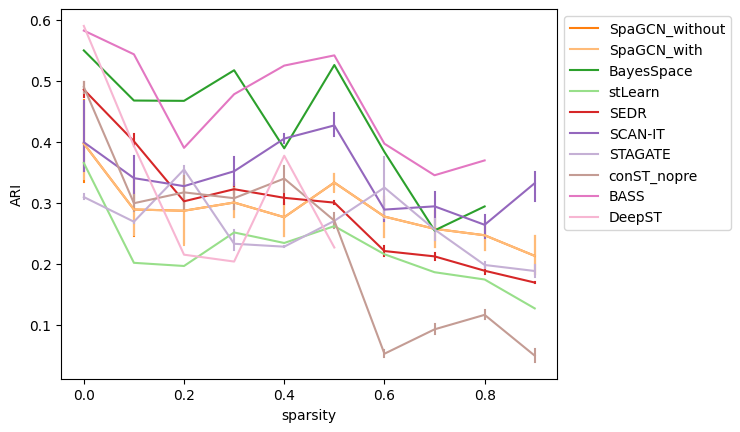

In [22]:
sns.lineplot(
    data=pd_df,
    x='sparsity',
    y='ARI',
    hue="algor_name",

    palette=method_color_dict,
    hue_order=method_order,
    
    legend = False,
    err_style='bars')
# plt.legend(labels = ['Day1','Day2'],loc = 2, bbox_to_anchor = (1,1))
plt.legend(labels = method_order2, loc = 2,bbox_to_anchor = (1,1))
# plt.legend(labels = ['CCST','SpaceFlow','BASS','STAGATE','DeepST','SCAN-IT','SpaGCN_without','BayesSpace','SEDR',
#     'stLearn','SpaGCN_with','Leiden','Louvain','conST_pre','conST_nopre'], bbox_to_anchor = (1,1))
plt.savefig('./sparsity_ari_all_down(lineplot).pdf',dpi=400,bbox_inches='tight',transparent=True)


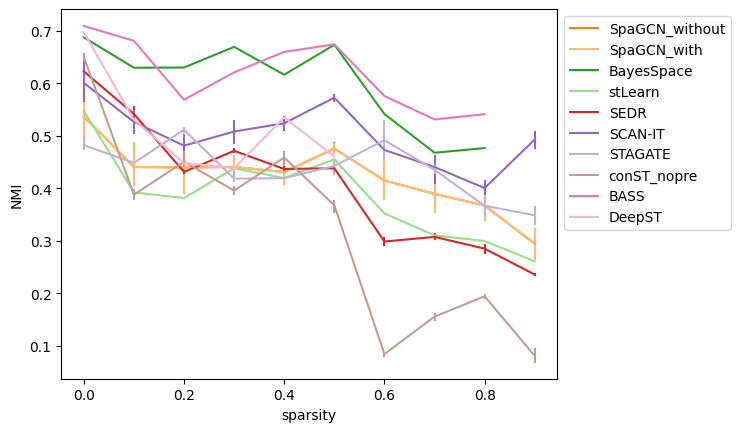

In [23]:
sns.lineplot(
    data=pd_df,
    x='sparsity',
    y='NMI',
    hue="algor_name",

    palette=method_color_dict,
    hue_order=method_order,
    
    legend = False,
    err_style='bars')
# plt.legend(labels = ['Day1','Day2'],loc = 2, bbox_to_anchor = (1,1))
plt.legend(labels = method_order2, loc = 2, bbox_to_anchor = (1,1))
plt.savefig('./sparsity_nmi_all_down(lineplot).pdf',dpi=400,bbox_inches='tight',transparent=True)
